In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [8]:
X = iris.data
y = iris.target

In [12]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = pd.Series(iris.target,name = "Species")

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [14]:
logreg = LogisticRegression(multi_class="multinomial", solver='newton-cg')

In [15]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
ypred = logreg.predict(X)

In [17]:
pd.crosstab(y, ypred)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,47,3
2,0,1,49


In [ ]:
#Petal Length and #Petal Width

In [19]:
x,y = np.meshgrid([0,1,2,3], [0,1])
print(x)
print(y)

[[0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]]


In [20]:
x.ravel()

array([0, 1, 2, 3, 0, 1, 2, 3])

In [21]:
y.ravel()

array([0, 0, 0, 0, 1, 1, 1, 1])

In [22]:
np.c_[x.ravel(), y.ravel()]

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1]])

In [23]:
#for iris dataset 

In [26]:
X[:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [28]:
#Petal length
x_min, x_max = X.iloc[:,2].min(), X.iloc[:,2].max()

In [29]:
#Petal Width
y_min, y_max = X.iloc[:,3].min(), X.iloc[:,3].max()

In [42]:
xx,yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
xx

array([[1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88],
       [1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88],
       [1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88],
       ...,
       [1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88],
       [1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88],
       [1.  , 1.02, 1.04, ..., 6.84, 6.86, 6.88]])

In [38]:
ds=np.c_[xx.ravel(), yy.ravel()]
ds

array([[1.  , 0.1 ],
       [1.02, 0.1 ],
       [1.04, 0.1 ],
       ...,
       [6.84, 2.48],
       [6.86, 2.48],
       [6.88, 2.48]])

In [35]:
y = pd.Series(iris.target,name = "Species")

In [36]:
logreg.fit(X.iloc[:, [2,3]],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
Z = logreg.predict(ds)
Z

array([0, 0, 0, ..., 2, 2, 2])

In [41]:
xx.shape

(120, 295)

In [43]:
Z.shape

(35400,)

In [45]:
Z = Z.reshape(xx.shape)

In [48]:
#plt.colormaps()

In [50]:
X[:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


Text(0, 0.5, 'Petal Width')

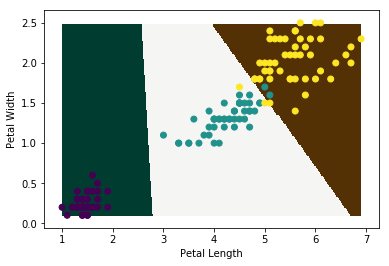

In [53]:
plt.pcolormesh(xx,yy, Z, cmap = 'BrBG_r')
plt.scatter(X.iloc[:,2], X.iloc[:,3], c = y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")